<a href="https://colab.research.google.com/github/gr3g-z/TCC-PUCSP-CDIA/blob/secondary/tcc_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sales Product

### Limpeza dos Dados

In [ ]:
!pip install fbprophet

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Using cached pystan-3.7.0-py3-none-any.whl (13 kB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl (18 kB)
  Using cached convertdate-2.4.0-py3-none-any.whl (47 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl (10 kB)
  Using cached PyMeeus-0.5.12-py3-none-any.whl
  Using cached ephem-4.1.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.8 MB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl (91 kB)
  Using cached httpstan-4.10.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (44.4 MB)
  Using cached pysimdjson-5.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.8 MB)
  Using cached crashtest-0.3.1-py3-none-any.whl (7.0 kB)
  Using cached pastel-0.2.1-py2.py3-none-any.whl (6.0 kB)
  Using cached pylev-1.4.0-py2.py3-none-any.whl (6.1 kB)
  Using cached marshmallow-3.20.1-py3-none-any.w

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from prophet import Prophet
import pandas as pd
import re

In [ ]:
jan = pd.read_csv('/content/drive/MyDrive/sales_data/Sales_January_2019.csv')
fev = pd.read_csv('/content/drive/MyDrive/sales_data/Sales_February_2019.csv')
mar = pd.read_csv('/content/drive/MyDrive/sales_data/Sales_March_2019.csv')
abr = pd.read_csv('/content/drive/MyDrive/sales_data/Sales_April_2019.csv')
mai = pd.read_csv('/content/drive/MyDrive/sales_data/Sales_May_2019.csv')
jun = pd.read_csv('/content/drive/MyDrive/sales_data/Sales_June_2019.csv')
jul = pd.read_csv('/content/drive/MyDrive/sales_data/Sales_July_2019.csv')
ago = pd.read_csv('/content/drive/MyDrive/sales_data/Sales_August_2019.csv')
sep = pd.read_csv('/content/drive/MyDrive/sales_data/Sales_September_2019.csv')
out = pd.read_csv('/content/drive/MyDrive/sales_data/Sales_October_2019.csv')
nov = pd.read_csv('/content/drive/MyDrive/sales_data/Sales_November_2019.csv')
dez = pd.read_csv('/content/drive/MyDrive/sales_data/Sales_December_2019.csv')

In [ ]:
df = pd.concat([jan, fev, mar, abr, mai, jun, jul, ago, sep, out, nov, dez])
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [ ]:
df['Product'].unique()

array(['iPhone', 'Lightning Charging Cable', 'Wired Headphones',
       '27in FHD Monitor', 'AAA Batteries (4-pack)',
       '27in 4K Gaming Monitor', 'USB-C Charging Cable',
       'Bose SoundSport Headphones', 'Apple Airpods Headphones',
       'Macbook Pro Laptop', 'Flatscreen TV', 'Vareebadd Phone',
       'AA Batteries (4-pack)', 'Google Phone', '20in Monitor',
       '34in Ultrawide Monitor', 'ThinkPad Laptop', 'LG Dryer',
       'LG Washing Machine', nan, 'Product'], dtype=object)

In [ ]:
print(df.isna().sum())

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64


In [ ]:
df = df.dropna(axis = 0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [ ]:
df['Order Date'].head()

0    01/22/19 21:25
1    01/28/19 14:15
2    01/17/19 13:33
3    01/05/19 20:33
4    01/25/19 11:59
Name: Order Date, dtype: object

In [ ]:
import pandas as pd

# Converta a coluna 'Order Date' para datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%y %H:%M', errors='coerce')


In [ ]:
df = df.dropna(subset=['Order Date'])


In [ ]:
df_cleaned = df.copy()

# Converta a coluna 'Order Date' para datetime
df_cleaned['Order Date'] = pd.to_datetime(df_cleaned['Order Date'], format='%m/%d/%y %H:%M', errors='coerce')

df_cleaned['Quantity Ordered'] = df_cleaned['Quantity Ordered'].astype(int)
df_cleaned['Price Each'] = df_cleaned['Price Each'].astype(float)

# Remova as linhas com valores não convertíveis
df_cleaned = df_cleaned.dropna(subset=['Order Date'])


In [ ]:
df_cleaned

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016"
25113,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001"
25114,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101"
25115,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001"


### FB Prophet Forecasting

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 9.9+ MB


In [ ]:
df_forecast = df_cleaned.iloc[:, [3, 4]] # Renomeie as colunas se desejar
df_forecast.columns = ['Price Each', 'Purchase Date']

In [ ]:
df_forecast = df_forecast.rename(columns={'Purchase Date': 'ds', 'Price Each': 'y'})

In [ ]:
df_forecast

,y,ds
0,700.00,2019-01-22 21:25:00
1,14.95,2019-01-28 14:15:00
2,11.99,2019-01-17 13:33:00
3,149.99,2019-01-05 20:33:00
4,11.99,2019-01-25 11:59:00
...,...,...
25112,14.95,2019-12-11 20:58:00
25113,3.84,2019-12-01 12:01:00
25114,400.00,2019-12-09 06:43:00
25115,11.99,2019-12-03 10:39:00


In [ ]:
m = Prophet()
m.fit(df_forecast)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzpq0yt23/o4qmglo0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzpq0yt23/0q_cjc3w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60881', 'data', 'file=/tmp/tmpzpq0yt23/o4qmglo0.json', 'init=/tmp/tmpzpq0yt23/0q_cjc3w.json', 'output', 'file=/tmp/tmpzpq0yt23/prophet_modeltel29wiy/prophet_model-20231017004046.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:40:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:40:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-01 03:07:00,184.387100,-267.333977,611.710992,184.387100,184.387100,-0.157811,-0.157811,-0.157811,0.224394,0.224394,0.224394,-0.382205,-0.382205,-0.382205,0.0,0.0,0.0,184.229289
1,2019-01-01 03:40:00,184.386823,-256.776640,609.669055,184.386823,184.386823,-2.611072,-2.611072,-2.611072,-2.262458,-2.262458,-2.262458,-0.348614,-0.348614,-0.348614,0.0,0.0,0.0,181.775751
2,2019-01-01 04:56:00,184.386184,-271.335456,571.053246,184.386184,184.386184,-6.253216,-6.253216,-6.253216,-5.988735,-5.988735,-5.988735,-0.264481,-0.264481,-0.264481,0.0,0.0,0.0,178.132968
3,2019-01-01 05:53:00,184.385705,-235.281776,595.559496,184.385705,184.385705,-5.257163,-5.257163,-5.257163,-5.061796,-5.061796,-5.061796,-0.195368,-0.195368,-0.195368,0.0,0.0,0.0,179.128542
4,2019-01-01 06:03:00,184.385621,-268.871454,607.896396,184.385621,184.385621,-4.762742,-4.762742,-4.762742,-4.580014,-4.580014,-4.580014,-0.182728,-0.182728,-0.182728,0.0,0.0,0.0,179.622879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142420,2020-01-27 05:13:00,182.826377,-261.558409,605.911016,182.422684,183.212358,-6.489291,-6.489291,-6.489291,-6.072409,-6.072409,-6.072409,-0.416881,-0.416881,-0.416881,0.0,0.0,0.0,176.337086
142421,2020-01-28 05:13:00,182.832729,-235.749287,632.122919,182.402318,183.251609,-6.316806,-6.316806,-6.316806,-6.072409,-6.072409,-6.072409,-0.244397,-0.244397,-0.244397,0.0,0.0,0.0,176.515923
142422,2020-01-29 05:13:00,182.839081,-248.664888,602.816406,182.387696,183.287643,-4.094052,-4.094052,-4.094052,-6.072409,-6.072409,-6.072409,1.978357,1.978357,1.978357,0.0,0.0,0.0,178.745029
142423,2020-01-30 05:13:00,182.845433,-242.091050,606.064712,182.379406,183.321399,-5.502964,-5.502964,-5.502964,-6.072409,-6.072409,-6.072409,0.569446,0.569446,0.569446,0.0,0.0,0.0,177.342470


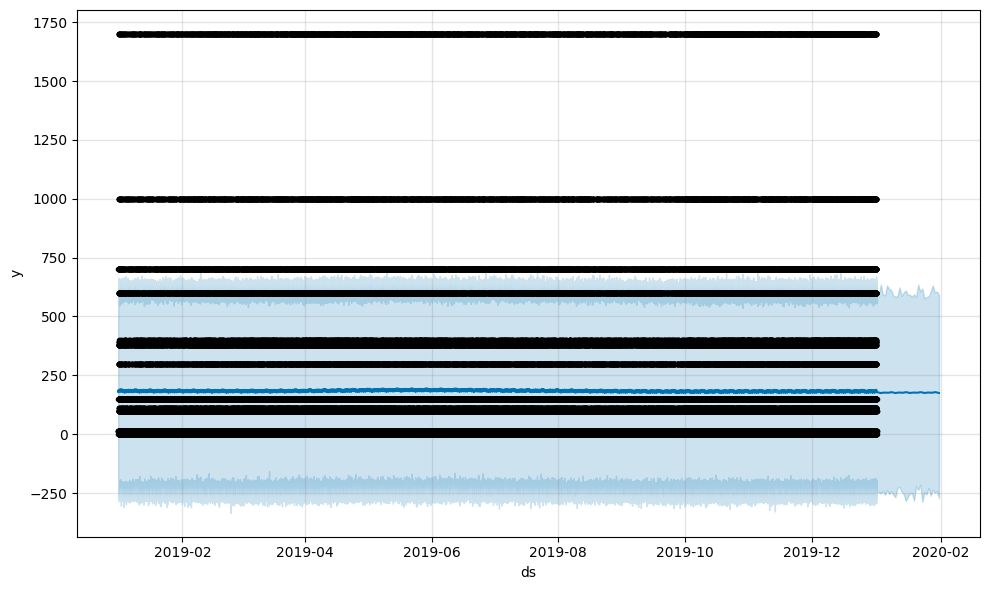

In [ ]:
m.plot(forecast);

## Divisao de Produtos

In [ ]:
df_cleaned['Product'].unique()

array(['iPhone', 'Lightning Charging Cable', 'Wired Headphones',
       '27in FHD Monitor', 'AAA Batteries (4-pack)',
       '27in 4K Gaming Monitor', 'USB-C Charging Cable',
       'Bose SoundSport Headphones', 'Apple Airpods Headphones',
       'Macbook Pro Laptop', 'Flatscreen TV', 'Vareebadd Phone',
       'AA Batteries (4-pack)', 'Google Phone', '20in Monitor',
       '34in Ultrawide Monitor', 'ThinkPad Laptop', 'LG Dryer',
       'LG Washing Machine'], dtype=object)

In [ ]:
top_produtos = df_cleaned['Product'].value_counts()
df_top_produtos = pd.DataFrame(list(top_produtos.items()), columns=['Product', 'Count'])
df_top_produtos

,Product,Count
0,USB-C Charging Cable,21903
1,Lightning Charging Cable,21658
2,AAA Batteries (4-pack),20641
3,AA Batteries (4-pack),20577
4,Wired Headphones,18882
5,Apple Airpods Headphones,15549
6,Bose SoundSport Headphones,13325
7,27in FHD Monitor,7507
8,iPhone,6842
9,27in 4K Gaming Monitor,6230


In [ ]:
import plotly.express as px

fig = px.bar(df_top_produtos, x='Product', y='Count', color = 'Product', title="Quantidade de Vendas por Produto em 2019")
fig.show()

### Apple Iphone

In [ ]:
produto_iphone = 'iPhone'

# Filtrar o DataFrame original para incluir apenas o produto específico
df_iPhone = df_cleaned[df_cleaned['Product'] == produto_iphone].copy()

In [ ]:
df_iPhone['Quantity Ordered'].unique()

array([1, 2])

In [ ]:
produto_iphone = 'iPhone'

# Filtrar o DataFrame original para incluir apenas o produto específico
df_iPhone = df_cleaned[df_cleaned['Product'] == produto_iphone].copy()
df_iPhone

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700.0,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
104,141336,iPhone,1,700.0,2019-01-09 18:23:00,"811 Hickory St, Portland, OR 97035"
164,141394,iPhone,1,700.0,2019-01-06 16:54:00,"534 12th St, San Francisco, CA 94016"
207,141437,iPhone,1,700.0,2019-01-10 15:40:00,"377 Meadow St, New York City, NY 10001"
228,141457,iPhone,1,700.0,2019-01-09 22:11:00,"820 Jackson St, Seattle, WA 98101"
...,...,...,...,...,...,...
25040,319596,iPhone,1,700.0,2019-12-01 08:44:00,"436 14th St, New York City, NY 10001"
25048,319603,iPhone,1,700.0,2019-12-26 19:06:00,"102 9th St, Boston, MA 02215"
25074,319629,iPhone,1,700.0,2019-12-18 15:41:00,"941 Willow St, Dallas, TX 75001"
25080,319634,iPhone,1,700.0,2019-12-11 16:29:00,"817 Center St, Boston, MA 02215"


In [ ]:
# Converta a coluna 'Order Date' para o tipo de dado de data
df_iPhone['Order Date'] = pd.to_datetime(df_iPhone['Order Date'])

# Crie uma nova coluna 'Date' que contenha apenas a data, ignorando a hora
df_iPhone['Date'] = df_iPhone['Order Date'].dt.date

# Agora, agrupe os dados por 'Date' e some a 'Quantity Ordered' em cada grupo
vendas_por_dia = df_iPhone.groupby('Date')['Quantity Ordered'].sum()

In [ ]:
vendas_por_dia

Date
2019-01-01    16
2019-01-02    15
2019-01-03    11
2019-01-04     7
2019-01-05     7
              ..
2019-12-28    20
2019-12-29    28
2019-12-30    28
2019-12-31    23
2020-01-01     2
Name: Quantity Ordered, Length: 366, dtype: int64

In [ ]:
# Converta a coluna 'Order Date' para o tipo de dado de data
df_iPhone['Order Date'] = pd.to_datetime(df_iPhone['Order Date'])

# Crie uma nova coluna 'Date' que contenha apenas a data, ignorando a hora
df_iPhone['Date'] = df_iPhone['Order Date'].dt.date

# Agora, agrupe os dados por 'Date' e some a 'Quantity Ordered' em cada grupo
vendas_por_dia = df_iPhone.groupby('Date')['Quantity Ordered'].sum()


In [ ]:
# Resetando o índice para que a data se torne uma coluna
df_iPhone_Dia = vendas_por_dia.reset_index()

# Renomeando as colunas
df_iPhone_Dia.columns = ['Data', 'Quantidade Vendida']

In [ ]:
df_iPhone_Dia

,Data,Quantidade Vendida
0,2019-01-01,16
1,2019-01-02,15
2,2019-01-03,11
3,2019-01-04,7
4,2019-01-05,7
...,...,...
361,2019-12-28,20
362,2019-12-29,28
363,2019-12-30,28
364,2019-12-31,23


In [ ]:
df_forecast_iPhone = df_iPhone_Dia # Renomeie as colunas se desejar
df_forecast_iPhone.df_forecast_iPhone = ['Quantidade Vendida', 'Data']
df_forecast_iPhone = df_iPhone_Dia.rename(columns={'Data': 'ds', 'Quantidade Vendida': 'y'})
m = Prophet()
m.fit(df_forecast_iPhone)

<ipython-input-39-b84287339e0c>:2: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzpq0yt23/nhvu864k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzpq0yt23/zrq3avro.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92304', 'data', 'file=/tmp/tmpzpq0yt23/nhvu864k.json', 'init=/tmp/tmpzpq0yt23/zrq3avro.json', 'output', 'file=/tmp/tmpzpq0yt23/prophet_model8o3dksqf/prophet_model-20231017004121.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:41:21 - cmdstanpy - INFO - Chain 

In [ ]:
df_forecast_iPhone

,ds,y
0,2019-01-01,16
1,2019-01-02,15
2,2019-01-03,11
3,2019-01-04,7
4,2019-01-05,7
...,...,...
361,2019-12-28,20
362,2019-12-29,28
363,2019-12-30,28
364,2019-12-31,23


In [ ]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)

In [ ]:
future

,ds
0,2019-01-01
1,2019-01-02
2,2019-01-03
3,2019-01-04
4,2019-01-05
...,...
391,2020-01-27
392,2020-01-28
393,2020-01-29
394,2020-01-30


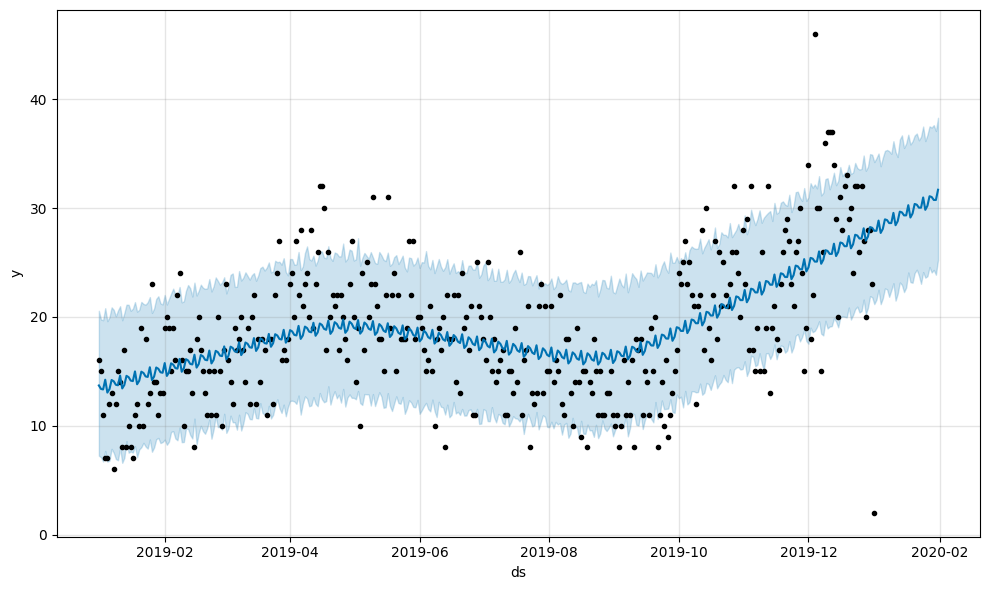

In [ ]:
m.plot(forecast);

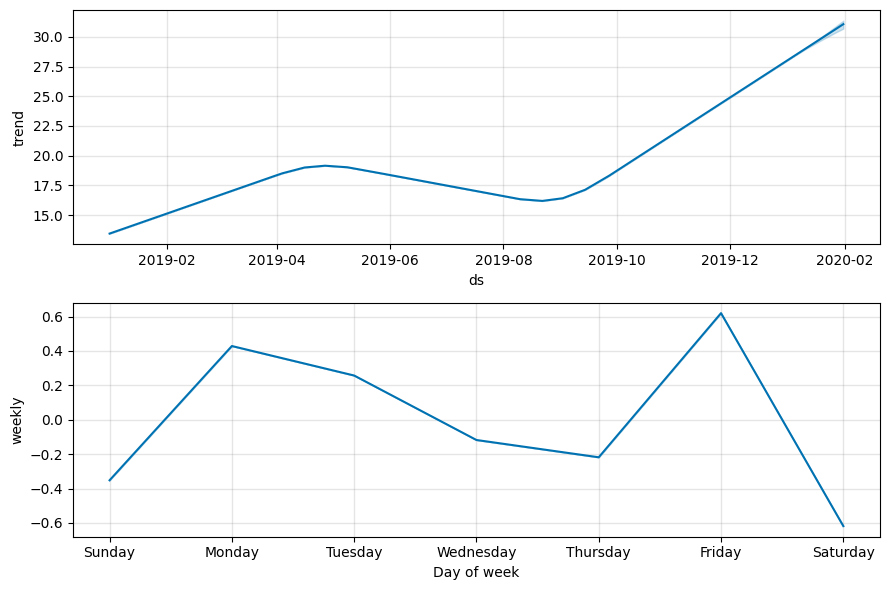

In [ ]:
m.plot_components(forecast);

### Google Phone

In [ ]:
produto_GooglePhone = 'Google Phone'
# Filtrar o DataFrame original para incluir apenas o produto específico
df_googlePhone = df_cleaned[df_cleaned['Product'] == produto_GooglePhone].copy()
df_googlePhone

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
22,141256,Google Phone,1,600.0,2019-01-29 10:40:00,"675 Washington St, Portland, OR 97035"
94,141326,Google Phone,1,600.0,2019-01-05 13:49:00,"131 Center St, San Francisco, CA 94016"
153,141384,Google Phone,1,600.0,2019-01-03 00:14:00,"223 Jackson St, Boston, MA 02215"
184,141414,Google Phone,1,600.0,2019-01-26 03:38:00,"609 14th St, New York City, NY 10001"
196,141426,Google Phone,1,600.0,2019-01-12 12:57:00,"824 Madison St, Dallas, TX 75001"
...,...,...,...,...,...,...
24865,319427,Google Phone,1,600.0,2019-12-08 10:48:00,"57 Sunset St, Dallas, TX 75001"
24885,319447,Google Phone,1,600.0,2019-12-29 20:18:00,"114 Lincoln St, San Francisco, CA 94016"
24998,319556,Google Phone,1,600.0,2019-12-22 08:23:00,"848 7th St, Austin, TX 73301"
25078,319632,Google Phone,1,600.0,2019-12-29 17:25:00,"59 Cherry St, Boston, MA 02215"


### Lightning Charging Cable

In [ ]:
produto_LightningCable = 'Lightning Charging Cable'
# Filtrar o DataFrame original para incluir apenas o produto específico
df_cabo = df_cleaned[df_cleaned['Product'] == produto_LightningCable].copy()
df_cabo

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
43,141276,Lightning Charging Cable,1,14.95,2019-01-21 22:23:00,"63 Cherry St, Los Angeles, CA 90001"
45,141278,Lightning Charging Cable,1,14.95,2019-01-26 12:14:00,"100 Cherry St, New York City, NY 10001"
46,141279,Lightning Charging Cable,1,14.95,2019-01-03 19:10:00,"938 14th St, Boston, MA 02215"
48,141281,Lightning Charging Cable,1,14.95,2019-01-05 16:51:00,"274 2nd St, Atlanta, GA 30301"
...,...,...,...,...,...,...
25077,319631,Lightning Charging Cable,1,14.95,2019-12-17 22:35:00,"363 Highland St, Austin, TX 73301"
25088,319642,Lightning Charging Cable,1,14.95,2019-12-22 19:23:00,"928 Chestnut St, Austin, TX 73301"
25097,319651,Lightning Charging Cable,1,14.95,2019-12-14 22:36:00,"763 Washington St, Boston, MA 02215"
25105,319659,Lightning Charging Cable,1,14.95,2019-12-13 07:25:00,"764 1st St, San Francisco, CA 94016"


### UBS-C Charging Cable

In [ ]:
produto_USBcCable = 'USB-C Charging Cable'
# Filtrar o DataFrame original para incluir apenas o produto específico
df_caboUsbC = df_cleaned[df_cleaned['Product'] == produto_USBcCable].copy()
df_caboUsbC

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
7,141241,USB-C Charging Cable,1,11.95,2019-01-05 12:04:00,"181 6th St, San Francisco, CA 94016"
18,141252,USB-C Charging Cable,1,11.95,2019-01-30 09:28:00,"220 9th St, Los Angeles, CA 90001"
21,141255,USB-C Charging Cable,1,11.95,2019-01-09 20:55:00,"764 11th St, Los Angeles, CA 90001"
27,141261,USB-C Charging Cable,1,11.95,2019-01-09 18:14:00,"840 Lincoln St, Atlanta, GA 30301"
37,141271,USB-C Charging Cable,1,11.95,2019-01-30 10:51:00,"90 13th St, Boston, MA 02215"
...,...,...,...,...,...,...
25017,319574,USB-C Charging Cable,1,11.95,2019-12-26 00:18:00,"259 7th St, Los Angeles, CA 90001"
25033,319589,USB-C Charging Cable,1,11.95,2019-12-01 12:09:00,"387 5th St, New York City, NY 10001"
25042,319597,USB-C Charging Cable,1,11.95,2019-12-30 20:01:00,"380 Church St, Portland, OR 97035"
25079,319633,USB-C Charging Cable,1,11.95,2019-12-07 07:12:00,"568 Walnut St, Atlanta, GA 30301"


### Wired Headphones

In [ ]:
produto_foneFio ='Wired Headphones'
df_foneFio = df_cleaned[df_cleaned['Product'] == produto_foneFio].copy()
df_foneFio


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"
36,141270,Wired Headphones,1,11.99,2019-01-27 23:10:00,"469 Hill St, San Francisco, CA 94016"
39,141273,Wired Headphones,2,11.99,2019-01-29 12:04:00,"994 13th St, Boston, MA 02215"
42,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301"
...,...,...,...,...,...,...
25063,319618,Wired Headphones,1,11.99,2019-12-16 15:18:00,"773 5th St, Boston, MA 02215"
25068,319623,Wired Headphones,1,11.99,2019-12-11 19:11:00,"164 Meadow St, Los Angeles, CA 90001"
25083,319637,Wired Headphones,1,11.99,2019-12-31 22:14:00,"641 Adams St, Portland, OR 97035"
25101,319655,Wired Headphones,1,11.99,2019-12-28 19:38:00,"614 Cherry St, Austin, TX 73301"


### Apple Airpods Headphones

In [ ]:
produto_AirPods ='Apple Airpods Headphones'
df_airPods = df_cleaned[df_cleaned['Product'] == produto_AirPods].copy()
df_airPods

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
9,141243,Apple Airpods Headphones,1,150.0,2019-01-22 21:20:00,"657 Johnson St, San Francisco, CA 94016"
10,141244,Apple Airpods Headphones,1,150.0,2019-01-07 11:29:00,"492 Walnut St, San Francisco, CA 94016"
17,141251,Apple Airpods Headphones,1,150.0,2019-01-24 08:13:00,"414 Walnut St, Boston, MA 02215"
23,141257,Apple Airpods Headphones,1,150.0,2019-01-12 18:51:00,"338 Highland St, San Francisco, CA 94016"
30,141264,Apple Airpods Headphones,1,150.0,2019-01-03 09:46:00,"937 Highland St, New York City, NY 10001"
...,...,...,...,...,...,...
25073,319628,Apple Airpods Headphones,1,150.0,2019-12-26 13:46:00,"421 Maple St, Boston, MA 02215"
25086,319640,Apple Airpods Headphones,1,150.0,2019-12-10 08:51:00,"116 Hickory St, Los Angeles, CA 90001"
25096,319650,Apple Airpods Headphones,1,150.0,2019-12-18 08:29:00,"574 Wilson St, New York City, NY 10001"
25102,319656,Apple Airpods Headphones,1,150.0,2019-12-26 23:17:00,"700 5th St, Dallas, TX 75001"


In [ ]:
df_teste = df_airPods.head(2)
df_teste

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
9,141243,Apple Airpods Headphones,1,150.0,2019-01-22 21:20:00,"657 Johnson St, San Francisco, CA 94016"
10,141244,Apple Airpods Headphones,1,150.0,2019-01-07 11:29:00,"492 Walnut St, San Francisco, CA 94016"


## Extracao de Enderecos


In [ ]:
!pip install geopy

In [ ]:
from geopy.geocoders import Nominatim

# Crie um objeto geocoder do Nominatim
geolocator = Nominatim(user_agent="my_coder")

# Endereço que você deseja geocodificar
endereco = "944 Walnut St, Boston, MA 02215"

# Faça uma consulta de geocodificação
location = geolocator.geocode(endereco)

if location:
    latitude = location.latitude
    longitude = location.longitude
    print(f'Latitude: {latitude}, Longitude: {longitude}')
else:
    print('Não foi possível encontrar as coordenadas para o endereço fornecido.')

Latitude: 42.357842, Longitude: -71.0661113


In [ ]:
latitude_list

[37.822232, 37.78722587755102, 37.822232, 37.78722587755102]

In [ ]:
from geopy.geocoders import Nominatim
import pandas as pd
import time

# Crie um objeto geocoder do Nominatim
geolocator = Nominatim(user_agent="my_coder")

# Função para geocodificar um endereço
def geocode_addresses(addresses):
    coordinates = []
    for address in addresses:
        time.sleep(40)  # Adicione um atraso de 20 segundos entre as solicitações
        location = geolocator.geocode(address)
        if location:
            coordinates.append((location.latitude, location.longitude))
        else:
            coordinates.append((None, None))
    return coordinates

# Suponha que você tenha um DataFrame chamado df_teste com a coluna "Purchase Address"
# e deseja adicionar colunas "Latitude" e "Longitude" com os valores geocodificados

# Defina o tamanho do lote
batch_size = 1

# Divida os endereços em lotes
batches = [df_teste["Purchase Address"][i:i+batch_size] for i in range(0, len(df_teste), batch_size)]

# Inicialize listas para as coordenadas
latitude_list = []
longitude_list = []

# Geocodificar em lotes e adicionar coordenadas diretamente ao DataFrame
for batch in batches:
    coordinates = geocode_addresses(batch)
    latitudes, longitudes = zip(*coordinates)
    latitude_list.extend(latitudes)
    longitude_list.extend(longitudes)

# Adicione as coordenadas ao DataFrame
df_teste["Latitude"] = latitude_list
df_teste["Longitude"] = longitude_list

# Exibir o DataFrame resultante
df_teste


KeyboardInterrupt: ignored

In [ ]:
df_teste

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Latitude,Longitude
9,141243,Apple Airpods Headphones,1,150.0,2019-01-22 21:20:00,"657 Johnson St, San Francisco, CA 94016",37.822232,-122.373269
10,141244,Apple Airpods Headphones,1,150.0,2019-01-07 11:29:00,"492 Walnut St, San Francisco, CA 94016",37.787226,-122.448399


In [ ]:
import folium

# Crie um objeto de mapa com coordenadas iniciais
mapa = folium.Map(location=[latitude, longitude], zoom_start=10)

# Adicione um marcador ao mapa
folium.Marker(
    location=[latitude, longitude],  # Coordenadas do marcador (latitude, longitude)
    popup='ponto',  # Texto que aparecerá ao clicar no marcador
    icon=folium.Icon(color='blue')  # Estilo do marcador (cor azul neste caso)
).add_to(mapa)

mapa

In [ ]:
import folium

# Crie um objeto de mapa com coordenadas iniciais
mapa = folium.Map(location=[latitude, longitude], zoom_start=10)

# Itere sobre as linhas do DataFrame df_teste para adicionar marcadores
for index, row in df_teste.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],  # Coordenadas do marcador (latitude, longitude)
        popup='ponto',  # Texto que aparecerá ao clicar no marcador
        icon=folium.Icon(color='blue')  # Estilo do marcador (cor azul neste caso)
    ).add_to(mapa)

mapa
